IFSC 7399

Assignment 7

Machine Learning Assignment 1

Submitted to Prof Ningning Wu

Submitted By Deepak Singla

#**ML Assignment 1**
In this assignment, you will use KNN Classifier and Decision Tree classifer on breast cancer dataset.

Before you start, run the following commands to mount google drive and import needed libraries.


### Mount Google Drive

In [80]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [81]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


### Import Needed Libraries

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.datasets import *
import seaborn as sns

<a name="p1"></a>

---
## **Breast Cancer Dataset**
---
#### **About the Dataset**
We've already used the Breast Cancer dataset to create a KNN model for classification; now it's time to create a decision tree model using it. This dataset contains mammography exam results and whether or not cancer was detected.

The features are as follows:
* `radius`
* `texture`: standard deviation of gray-scale values
* `perimeter`
* `area`
* `smoothness`: local variations in radius lengths
* `compactness`: perimeter^2 / area - 1
* `concavity`: severity of concave portions of the contour
* `concave points`: number of concave portions of the contour
* `symmetry`
* `fractal dimension`: "coastline approximation" - 1
* `target`: Cancer or non-cancer

Note: There is data recorded for the mean, standard error, and worst (or largest) for each feature, resulting in 30 total features.
<br>

#### **Your Task**
Using the Breast Cancer dataset, create a decision tree model and KNN odel to classify breast cancer tumors as malignant (0) or benign (1).

### **Task 1**:  Build a decision tree model on the breast cancer dataset and evaluate the model.

#### Load and Preview Data

In [83]:
#load the data
from sklearn.datasets import *

data = load_breast_cancer()

df_cancer = pd.DataFrame(data.data, columns=data.feature_names)
df_cancer['target'] = data.target
df_cancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [84]:
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [85]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

#### Split Data into Training and Test Dataset
**Note** use a test_size other than 0.2.  A typical test_size is between 0.2 - 0.3

In [86]:
# Decide predictor features and class label
x = df_cancer.drop('target', axis=1)
y = df_cancer['target']




In [87]:
#split the data into training dataset and test dataset
#using .03 split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)




#### Build Decision Tree Classifier

In [88]:
# import the decision tree model
dt = DecisionTreeClassifier()



In [89]:
# train the DT model
dt.fit(X_train, y_train)


DecisionTreeClassifier()

In [90]:
# test the DT model
y_pred = dt.predict(X_test)
print(y_pred)


[1 0 0 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0
 1 0 1 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0 1 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 0 0
 0 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1]


#### Evaluate Decision Tree Classifier

In [91]:
# evaluate the model using classification report
print(classification_report(y_test, y_pred))


from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

ac=accuracy_score(y_test, y_pred)
ps=precision_score(y_test,y_pred)
rs=recall_score(y_test, y_pred)
f1=f1_score(y_test, y_pred)

print('accuracy: \t'+ str(ac))
print('precision score: \t' + str(ps))
print('recall score : \t' + str(rs))
print('f1 score: \t'+ str(f1))


              precision    recall  f1-score   support

           0       0.87      0.92      0.89        63
           1       0.95      0.92      0.93       108

    accuracy                           0.92       171
   macro avg       0.91      0.92      0.91       171
weighted avg       0.92      0.92      0.92       171

accuracy: 	0.9181286549707602
precision score: 	0.9519230769230769
recall score : 	0.9166666666666666
f1 score: 	0.9339622641509434


In [92]:
from sklearn.metrics import classification_report
report=classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.92      0.89        63
           1       0.95      0.92      0.93       108

    accuracy                           0.92       171
   macro avg       0.91      0.92      0.91       171
weighted avg       0.92      0.92      0.92       171



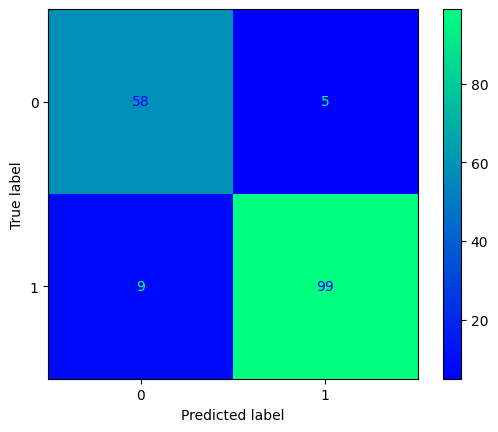

[[58  5]
 [ 9 99]]


In [93]:
# evaluate the model using confusion matrix
#viridis is the default color
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(y_test, y_pred)
disp=ConfusionMatrixDisplay(cm)


disp.plot(cmap=plt.cm.winter)
plt.show()

print(confusion_matrix(y_test, y_pred))


####**Challenge**
**Can you improve the performance using feature selction?**

accuracy: 	0.9298245614035088
precision score: 	0.9528301886792453
recall score : 	0.9351851851851852
f1 score: 	0.9439252336448598
              precision    recall  f1-score   support

           0       0.89      0.92      0.91        63
           1       0.95      0.94      0.94       108

    accuracy                           0.93       171
   macro avg       0.92      0.93      0.93       171
weighted avg       0.93      0.93      0.93       171



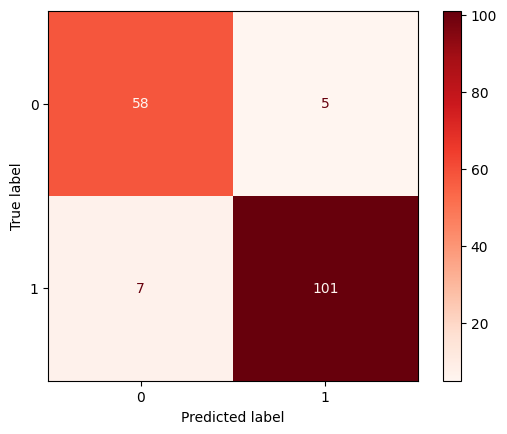

In [114]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k=10)
selector.fit(X_train, y_train)
x_train_new = selector.transform(X_train)
x_test_new = selector.transform(X_test)
dt_new = DecisionTreeClassifier()
dt_new.fit(x_train_new, y_train)
y_pred_new = dt_new.predict(x_test_new)
ac_new = accuracy_score(y_test, y_pred_new)
ps_new = precision_score(y_test,y_pred_new)
rs_new = recall_score(y_test, y_pred_new)
f1_new = f1_score(y_test, y_pred_new)
print('accuracy: \t'+ str(ac_new))
print('precision score: \t' + str(ps_new))
print('recall score : \t' + str(rs_new))
print('f1 score: \t'+ str(f1_new))
from sklearn.metrics import classification_report
report=classification_report(y_test, y_pred_new)
print(report)


cm_new = confusion_matrix(y_test, y_pred_new)
disp_new = ConfusionMatrixDisplay(cm_new)
disp_new.plot(cmap=plt.cm.Reds)

accuracy: 	0.9473684210526315
precision score: 	0.9541284403669725
recall score : 	0.9629629629629629
f1 score: 	0.9585253456221198
classification_report :
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        63
           1       0.95      0.96      0.96       108

    accuracy                           0.95       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



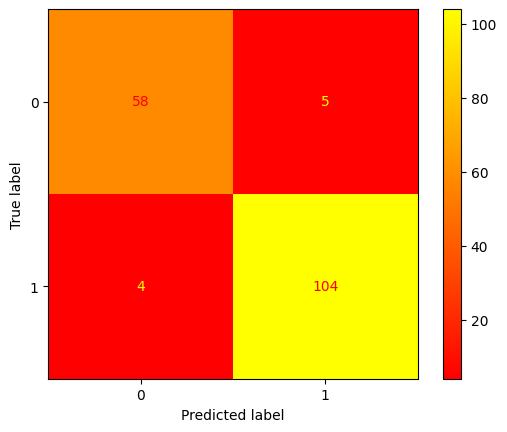

In [101]:
# evaluate the model using confusion matrix

from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k=10)
selector.fit(X_train, y_train)

x_train_new = selector.transform(X_train)
x_test_new = selector.transform(X_test)
dt_new = DecisionTreeClassifier()

dt_new.fit(x_train_new, y_train)
y_pred_new = dt_new.predict(x_test_new)
ac_new = accuracy_score(y_test, y_pred_new)
ps_new = precision_score(y_test,y_pred_new)
rs_new = recall_score(y_test, y_pred_new)
f1_new = f1_score(y_test, y_pred_new)

print('accuracy: \t'+ str(ac_new))
print('precision score: \t' + str(ps_new))
print('recall score : \t' + str(rs_new))
print('f1 score: \t'+ str(f1_new))

from sklearn.metrics import classification_report
classification_report=classification_report(y_test, y_pred_new)

print("classification_report :")
print(classification_report);


cm_new = confusion_matrix(y_test, y_pred_new)
disp_new = ConfusionMatrixDisplay(cm_new)
disp_new.plot(cmap=plt.cm.autumn)















### **Task 2**:  Build a KNN model to predict breast cancer and evaluate its performance.  You can choose any K number you want.

#### Build KNN classifier

In [102]:

#Build KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
print(knn)



KNeighborsClassifier()


#### Evaluate KNN classifier using classification report and display confusion matrix

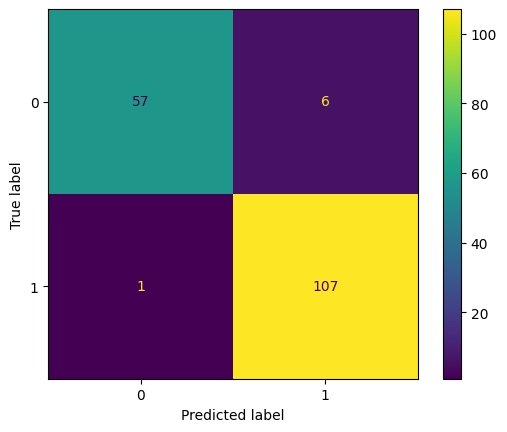

In [103]:
#Evaluate KNN classifier using classification report and display confusion matrix
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

confusionMatrix = confusion_matrix(y_test, y_pred)
plotconfusionMatrix = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix, display_labels=knn.classes_)
plotconfusionMatrix.plot()
plt.show()


#### **Model Improvement:** Try three different K values and compare their performance.

In [118]:
#Model Improvement: Try three different K values and compare their performance.
k_values = [1, 3, 5]

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    print(f"K = {k}")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}\n")





K = 1
              precision    recall  f1-score   support

           0       0.93      0.89      0.91        63
           1       0.94      0.96      0.95       108

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171

Accuracy: 0.935672514619883

K = 3
              precision    recall  f1-score   support

           0       0.93      0.90      0.92        63
           1       0.95      0.96      0.95       108

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171

Accuracy: 0.9415204678362573

K = 5
              precision    recall  f1-score   support

           0       0.98      0.90      0.94        63
           1       0.95      0.99      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       1